In [1]:
import numpy as np
import copy
import pandas as pd
import seaborn as sns
sns.set_style("white")
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Data/s_trn_femto_bear1_1.txt', header = None, sep='\s+').T
data.columns = [0, 1]
data.head()

,0,1
0,0.561746,0.435801
1,0.535112,0.420968
2,0.531158,0.425605
3,0.554833,0.445524
4,0.566652,0.423847


# Details Dataset
- blabla 

In [3]:
data.describe()

,0,1
count,2803.000000,2803.000000
mean,0.676392,0.479459
std,0.564982,0.314074
min,0.292975,0.318224
25%,0.353237,0.368102
50%,0.487456,0.430632
75%,0.835165,0.485966
max,6.707560,5.119619


In [4]:
# create list minutes
minutes = []
start = 0
for t in range(len(data)):
    minutes.append(start)
    start += 20

In [5]:
# add into dataframe
se = pd.Series(minutes)
data['Time'] = se.values
data.head()

,0,1,Time
0,0.561746,0.435801,0
1,0.535112,0.420968,20
2,0.531158,0.425605,40
3,0.554833,0.445524,60
4,0.566652,0.423847,80


[Text(0.5,0,'Time (min)')]

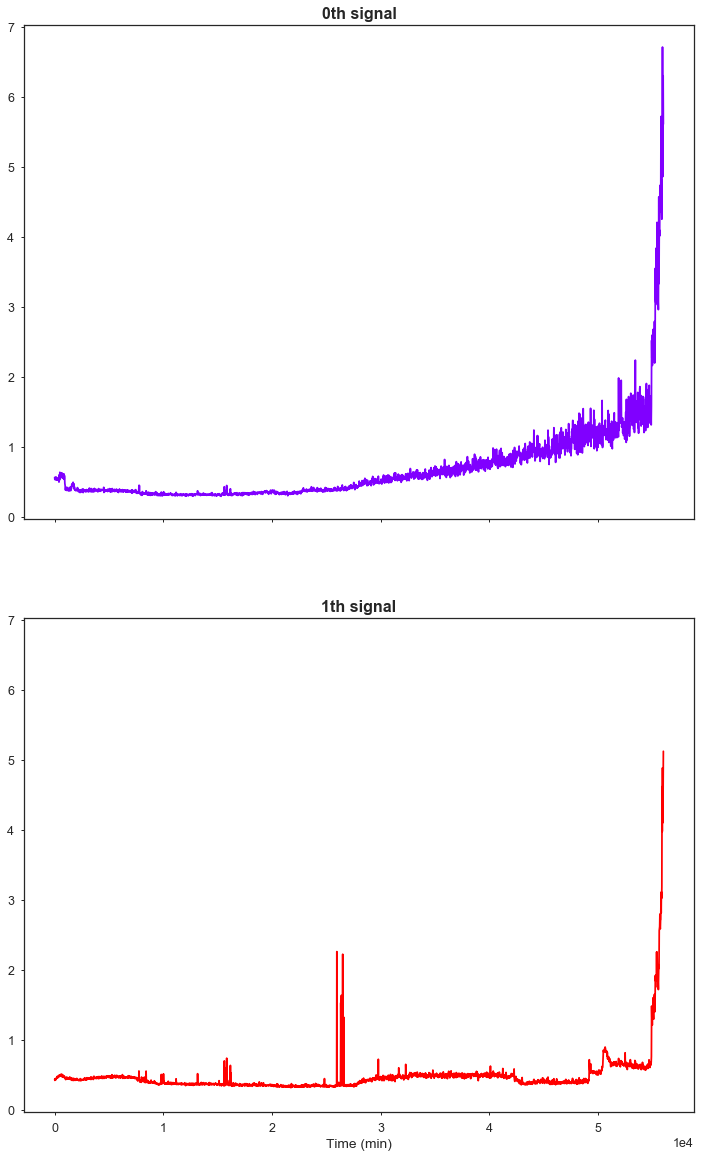

In [6]:
# draw plot of each signals
sns.set(font_scale=1.25)
style_kwds = {'xtick.major.size': 3, 'ytick.major.size': 3,
              'legend.frameon': True}
sns.set_style('white', style_kwds)

fig, axs = plt.subplots(2, sharex=True, sharey=True, figsize=(12,20))
colors = cm.rainbow(np.linspace(0, 1, 2))

for i, (ax, color) in enumerate(zip(axs, colors)):
    # use fancy indexing to plot data in each state
    mask = data.Time == i
    ax.plot(data.Time,
            data[i],
            c=color)
    ax.set_title("{0}th signal".format(i), fontsize=16, fontweight='demi')
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.set(xlabel='Time (min)')

# K-means 

In [7]:
from sklearn.cluster import KMeans

In [8]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=0).fit(data[0].values.reshape(-1, 1))

# sorting kmeans labels
idx = np.argsort(kmeans.cluster_centers_.sum(axis=1))
lut = np.zeros_like(idx)
lut[idx] = np.arange(k)
print(idx)

cluster = lut[kmeans.labels_]
data['Cluster'] = lut[kmeans.labels_]

[1 0 2]


In [9]:
data.tail()

,0,1,Time,Cluster
2798,6.707560,4.882920,55960,2
2799,4.856943,4.170096,55980,2
2800,5.130328,4.100455,56000,2
2801,6.297325,4.511000,56020,2
2802,5.607562,5.119619,56040,2


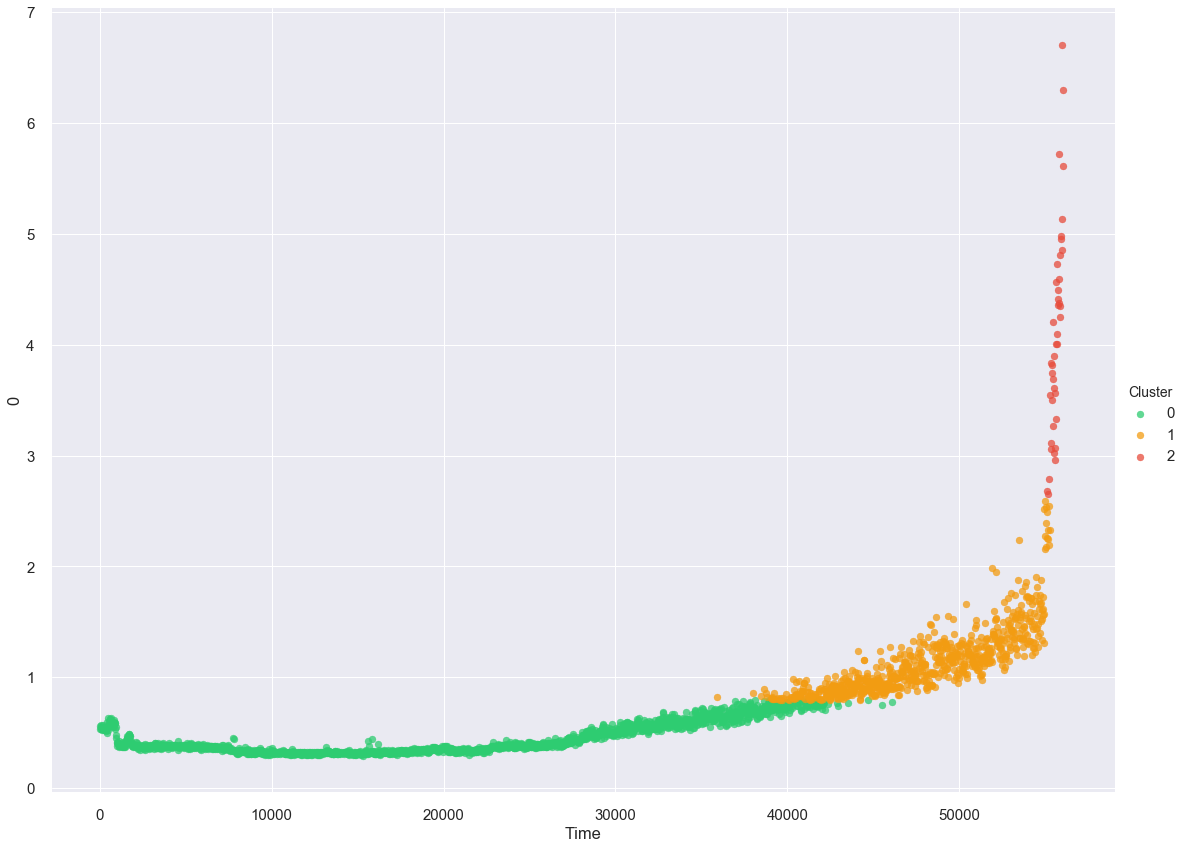

In [10]:
sns.set(font_scale=1.5)
order = [0, 1, 2]
flatui = ["#2ecc71", "#f39c12", "#e74c3c"]

fg = sns.FacetGrid(data=data, hue='Cluster', palette=sns.color_palette(flatui),
                   aspect=1.31, size=12)
fg.map(plt.scatter, 'Time', 0, alpha=0.75).add_legend()
sns.despine(offset=10)

In [11]:
range0 = []
range1 = []
range2 = []

for idx, row in data.iterrows():
    if row['Cluster'] == 0:
        range0.append(row[0])
    elif row['Cluster'] == 1:
        range1.append(row[0])
    elif row['Cluster'] == 2:
        range2.append(row[0])

In [12]:
print('Range nilai 0:', min(range0), max(range0))
print('Range nilai 1:', min(range1), max(range1))
print('Range nilai 2:', min(range2), max(range2))

Range nilai 0: 0.29297536 0.7945987
Range nilai 1: 0.79575212 2.5934874
Range nilai 2: 2.6574424 6.7075595


In [13]:
states = ['green', 'orange', 'red']
n_states = len(states)

observations = [0, 1, 2]
n_observations = len(observations)

# initial probability
phi = np.array([0.34, 0.33, 0.33])

# transition probability
A = np.array([[0.6, 0.3, 0.1],
              [0.2, 0.6, 0.2],
              [0.1, 0.3, 0.6]])

# observation probability
B = np.array([[0.5, 0.2, 0.3],
              [0.3, 0.6, 0.1],
              [0.1, 0.3, 0.6]])

In [14]:
from hmmlearn import hmm

In [15]:
# initialize hmm
model = hmm.MultinomialHMM(n_components=n_states, tol=1e-6, n_iter=2000, random_state=42, verbose=True)
model.startprob = phi
model.transmat = A
model.emissionprob = B

In [16]:
# observation sequence
obs_seq = np.array([data['Cluster'].values])
obs_seq

array([[0, 0, 0, ..., 2, 2, 2]], dtype=int64)

In [17]:
# learning
model = model.fit(obs_seq)

         1       -3218.7859             +nan
         2       -1445.5540       +1773.2319
         3        -865.7778        +579.7762
         4        -538.7463        +327.0315
         5        -482.4638         +56.2826
         6        -469.1667         +13.2970
         7        -459.8863          +9.2805
         8        -448.9534         +10.9328
         9        -432.7709         +16.1826
        10        -410.1790         +22.5919
        11        -384.2404         +25.9386
        12        -362.9086         +21.3317
        13        -354.0033          +8.9053
        14        -350.7435          +3.2598
        15        -346.7546          +3.9890
        16        -345.9689          +0.7857
        17        -345.9367          +0.0322
        18        -345.9358          +0.0009
        19        -345.9357          +0.0000
        20        -345.9357          +0.0000


In [18]:
model.startprob_

array([4.92748130e-044, 1.00000000e+000, 2.98735492e-175])

In [19]:
model.transmat_

array([[9.94669445e-01, 3.54402340e-12, 5.33055519e-03],
       [5.19970899e-04, 9.99480029e-01, 4.24756571e-56],
       [8.01759465e-17, 2.41473901e-43, 1.00000000e+00]])

In [20]:
model.emissionprob_

array([[6.28592227e-001, 3.71407773e-001, 1.60864915e-110],
       [9.98905474e-001, 1.09452587e-003, 8.59146993e-242],
       [1.01094702e-002, 9.30660611e-001, 5.92299191e-002]])

In [21]:
log_prob, best_path = model.decode(obs_seq.T, algorithm='viterbi')

In [22]:
log_prob

-347.5754903013376

In [23]:
best_path

array([1, 1, 1, ..., 2, 2, 2])

In [24]:
result = model.predict(obs_seq.T)
result

array([1, 1, 1, ..., 2, 2, 2])

In [25]:
result[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Test the model

In [26]:
def norm_data(list_data):
    result = []
    for data in list_data:
        if data < 0.796:
            result.append(0)
        elif data >= 0.796 and data <= 2.593:
            result.append(1)
        elif data > 2.593:
            result.append(2)
    return result

## Test 1

In [27]:
test_1 = np.array([data[0][2760:2780]])
test_1

array([[2.3328673, 2.7889558, 2.1962294, 2.546714 , 2.3284155, 3.548933 ,
        3.1147374, 3.0598314, 3.834164 , 3.5017036, 3.7450229, 3.8161293,
        3.2670098, 4.2044804, 3.6924409, 3.0263969, 3.9003265, 3.6052832,
        3.0712088, 2.9584827]])

In [28]:
normalize_test1 = np.array([norm_data(test_1[0])])
print(normalize_test1)

[[1 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]]


In [29]:
predict_test1 = model.predict(normalize_test1.reshape(-1, 1))
result1 = [x if x==2 else 1-x for x in predict_test1]
print(result1)

[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [30]:
result_test1 = ', '.join(map(lambda x: states[x], result1))
result_test1

'orange, red, red, red, red, red, red, red, red, red, red, red, red, red, red, red, red, red, red, red'

## Test 2

In [31]:
test_2 = np.array([[0.31, 0.28, 0.56, 0.71, 0.92, 
                    1.34, 1.58, 1.61, 1.94, 2.11, 
                    2.56, 2.89, 3.72, 5.18, 7.81]])

In [32]:
normalize_test2 = np.array([norm_data(test_2[0])])
normalize_test2

array([[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2]])

In [33]:
predict_test2 = model.predict(normalize_test2.reshape(-1, 1))
result2 = [x if x==2 else 1-x for x in predict_test2]
print(result2)

[0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [34]:
result_test2 = ', '.join(map(lambda x: states[x], result2))
result_test2

'green, green, green, orange, red, red, red, red, red, red, red, red, red, red, red'

## Test 3

In [35]:
test_3 = np.array([[0.31, 0.28, 0.56, 0.71, 2.12, 
                    1.21, 0.66, 0.71, 1.94, 2.11, 
                    2.56, 2.89, 3.72, 5.18, 7.81]])

In [36]:
normalize_test3 = np.array([norm_data(test_3[0])])
normalize_test3

array([[0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 2, 2, 2, 2]])

In [37]:
predict_test3 = model.predict(normalize_test3.reshape(-1, 1))
result3 = [x if x==2 else 1-x for x in predict_test3]
print(result3)

[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2]


In [38]:
result_test3 = ', '.join(map(lambda x: states[x], result3))
result_test3

'green, green, green, green, orange, orange, orange, orange, red, red, red, red, red, red, red'

## Test from bearing test

In [40]:
data_test = pd.read_csv('Data/s_tst_femto_bear1_3.txt', header = None, sep='\s+').T
data_test.columns = [0, 1]
data_test.head()

,0,1
0,0.415616,0.302195
1,0.391144,0.305312
2,0.389165,0.301042
3,0.380670,0.296139
4,0.400809,0.300955


In [41]:
data_test.describe()

,0,1
count,1802.000000,1802.000000
mean,0.435012,0.438601
std,0.134025,0.444673
min,0.317319,0.281754
25%,0.354244,0.317309
50%,0.378622,0.350742
75%,0.451938,0.379305
max,1.664720,5.846451


In [43]:
# create list minutes
minutes = []
start = 0
for t in range(len(data_test)):
    minutes.append(start)
    start += 20

In [44]:
# add into dataframe
se = pd.Series(minutes)
data_test['Time'] = se.values
data_test.head()

,0,1,Time
0,0.415616,0.302195,0
1,0.391144,0.305312,20
2,0.389165,0.301042,40
3,0.380670,0.296139,60
4,0.400809,0.300955,80


[Text(0.5,0,'Time (min)')]

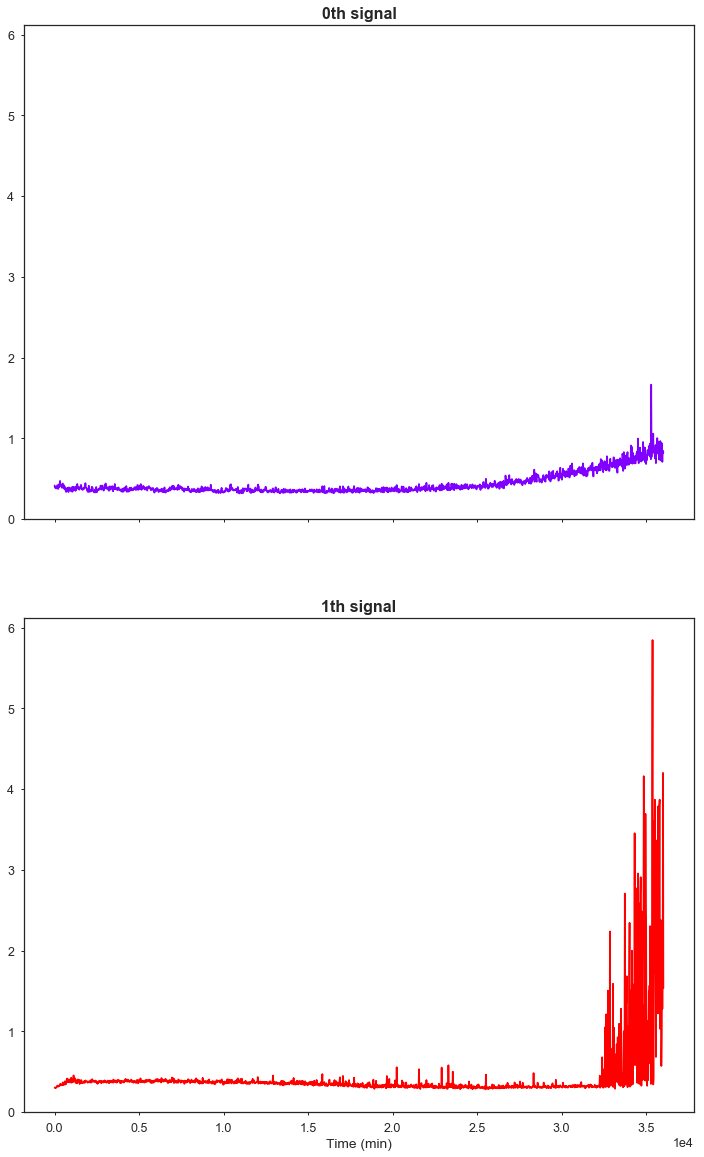

In [45]:
# draw plot of each signals
sns.set(font_scale=1.25)
style_kwds = {'xtick.major.size': 3, 'ytick.major.size': 3,
              'legend.frameon': True}
sns.set_style('white', style_kwds)

fig, axs = plt.subplots(2, sharex=True, sharey=True, figsize=(12,20))
colors = cm.rainbow(np.linspace(0, 1, 2))

for i, (ax, color) in enumerate(zip(axs, colors)):
    # use fancy indexing to plot data in each state
    mask = data_test.Time == i
    ax.plot(data_test.Time,
            data_test[i],
            c=color)
    ax.set_title("{0}th signal".format(i), fontsize=16, fontweight='demi')
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.set(xlabel='Time (min)')